# Introduction to (deep) neural networks

<sup>This notebook is a part of Natural Language Processing class at the University of Ljubljana, Faculty for computer and information science. Please contact [slavko.zitnik@fri.uni-lj.si](mailto:slavko.zitnik@fri.uni-lj.si) for any comments.</sub>

An artificial neural network is a network inspired by biological neural networks which are used to estimate or approximate functions that can depend on a large number of inputs. The notion *deep* comes from computational models that are composed of multiple processing layers to learn representations of data with multiple levels of abstraction.

In this notebook we will use [Keras](https://keras.io/), which is a high-level API to train neural networks using different backends like [Tensorflow](https://github.com/tensorflow/tensorflow), [Theano](https://github.com/Theano/Theano) or [CNTK](https://github.com/Microsoft/cntk). 

For starters, we can check a simple Tensorflow's neural network visualization: [http://playground.tensorflow.org/](http://playground.tensorflow.org/).

To install the basic requirements to work with Keras and Tensorflow, issue the following commands (for GPU-based installation, please see the [Tensorflow's documentation](https://www.tensorflow.org/install/)).

## Introduction to neural networks

A neural network (NN) is built from nodes (neurons) stacked in layers between the feature vector and the target vector. The simplest version of NN consists of one node - *perceptron*.

The Perceptron is an algorithm for supervised learning of binary classifiers - functions that can decide whether an input (represented by a vector of numbers) belongs to one class or another. Much like logistic regression, the weights in a neural net are being multiplied by the input vertor summed up and feeded into the activation function's input.

A Perceptron Network can be designed to have multiple layers, leading to the Multi-Layer Perceptron (MLP).

<img src="imgs/single_layer.png" width="65%" />

_(Source: Python Machine Learning, S. Raschka)_

### Weights updating

To find *the best* weights coefficients, we use an optimization algorithm (e.g. gradient descent). In every epoch we update the weight vector $w$ using the following update rule:

$$
w = w + \Delta w, \text{where } \Delta w = - \eta \nabla J(w)
$$

To update the weights of the model, we update weights into the opposite direction (i.e. backward) of the gradient $ \nabla J(w)$. 

In order to find the optimal weights of the model, we optimize an objective function (e.g. the sum of squared srrors) cost function $J(w)$. 

Furthermore, we multiply the gradient by a factor - the learning rate $\eta$ , which we choose to balance the speed of learning against the risk of missing the global minimum of the cost function.

### Activation function

We define the activation function $\phi(\cdot)$ as follows:

$$
z = \sum_{j} (w_j x_j + b_j) = \mathbf{w}^T \mathbf{x} + b
$$

$$
a = \phi(z)
$$

Examples of activation functions are $sigmoid$, $tanh$, $ReLu$, ...

### Binary classification

While we use the activation $\phi(z)$ to compute the gradient update, we may use a threshold function _(Heaviside function)_ to squash the continuous-valued output into binary class labels for prediction:

$$
\hat{y} = 
\begin{cases}
    1 & \text{if } \phi(z) \geq 0 \\
    0 & \text{otherwise}
\end{cases}
$$

## Multi-layer neural networks architecture 

<img src="imgs/multi-layers-1.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

The figure shows the concept of an MLP consisting of three layers: one _input_ layer, one _hidden_ layer, and one _output_ layer. 

The units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer, respectively. 

If such a network has **more than one hidden layer**, we also call it a **deep artificial neural network**.



Further we use Keras with a selected backend, which already has implemented all the needed statistical methods we need.

## Introduction to Keras


### The Otto Group dataset (Kaggle) preparation

>The Otto Group is one of the world’s biggest e-commerce companies, A consistent analysis of the performance of products is crucial. However, due to diverse global infrastructure, many identical products get classified differently.
For this competition, we have provided a dataset with 93 features for more than 200,000 products. The objective is to build a predictive model which is able to distinguish between our main product categories. 
Each row corresponds to a single product. There are a total of 93 numerical features, which represent counts of different events. All features have been obfuscated and will not be defined any further.

https://www.kaggle.com/c/otto-group-product-classification-challenge/data (downloaded data in folder *data/kaggle_ottogroup/* folder)

In [1]:
from scripts.kaggle_data import load_data, preprocess_data, preprocess_labels
import numpy as np
import matplotlib.pyplot as plt

X_train, labels = load_data('data/kaggle_ottogroup/train.csv', train=True)
X_train, scaler = preprocess_data(X_train)
Y_train, encoder = preprocess_labels(labels)

X_test, ids = load_data('data/kaggle_ottogroup/test.csv', train=False)
X_test, _ = preprocess_data(X_test, scaler)

nb_classes = Y_train.shape[1]
dims = X_train.shape[1]

print(f"The dataset contains {nb_classes} classes and {dims} features.")
print(f"Label values: {np.unique(labels)}")
print(f"\nFirst three labels: {labels[:3]}")
print(f"Labels are one-hot encoded for training: \n{Y_train}")

print(f"\nTraining data: \n{X_train}")

The dataset contains 9 classes and 93 features.
Label values: ['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']

First three labels: ['Class_2' 'Class_3' 'Class_4']
Labels are one-hot encoded for training: 
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Training data: 
[[ 0.40209323 -0.21010602 -0.30716544 ... -0.12951551 -0.3869381
  -0.10496315]
 [-0.2535081  -0.21010602 -0.30716544 ... -0.12951551 -0.3869381
  -0.10496315]
 [-0.2535081  -0.21010602 -0.30716544 ... -0.12951551 -0.3869381
  -0.10496315]
 ...
 [-0.2535081   1.3872573  -0.30716544 ... -0.12951551 -0.3869381
  -0.10496315]
 [-0.2535081   0.58857566  0.37431332 ... -0.12951551 -0.3869381
  -0.10496315]
 [-0.2535081  -0.21010602 -0.30716544 ... -0.12951551  0.6310014
  -0.10496315]]


### Using Keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

print("Building model ...")
model = Sequential()
model.add(Dense(nb_classes, input_shape=(dims,)))
model.add(Activation('softmax'))

print("Compile structure ...")
model.compile(optimizer='sgd', loss='categorical_crossentropy')

print("Fit model ...")
model.fit(X_train, Y_train)

print("\nModel description:")
model.summary()

Building model ...
Compile structure ...
Fit model ...
1934/1934 [==============================] - 2s 924us/step - loss: 1.4144

Model description:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 846       
_________________________________________________________________
activation (Activation)      (None, 9)                 0         
Total params: 846
Trainable params: 846
Non-trainable params: 0
_________________________________________________________________


#### Keras model visualization:

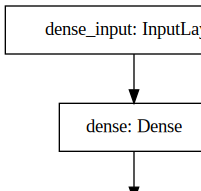

In [3]:
# Code to save image to file:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png')

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

#Graphical
SVG(model_to_dot(model).create(prog='dot', format='svg'))

**Dense layer** (for other predefined layers, see [Keras layers](https://keras.io/layers/about-keras-layers/)):

```python
from keras.layers.core import Dense

Dense(units, activation=None, use_bias=True, 
      kernel_initializer='glorot_uniform', bias_initializer='zeros', 
      kernel_regularizer=None, bias_regularizer=None, 
      activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

* `units`: int > 0.

* `activation`: name of activation function to use (see [activations](https://keras.io/activations/)), or alternatively, elementwise Theano function. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).

* `use_bias`: whether to include a bias (i.e. make the layer affine rather than linear).

* `kernel_initializer`: initializer for the kernel weights matrix (see [initializers](https://keras.io/initializers/)).

* `bias_initializer`: initializer for the bias vector (see [initializers](https://keras.io/initializers/)).

* `kernel_regularizer`: instance of WeightRegularizer (eg. L1 or L2 regularization), applied to the main weights matrix.

* `bias_regularizer`: instance of WeightRegularizer, applied to the bias.

* `activity_regularizer`: instance of ActivityRegularizer, applied to the network output.

* `kernel_constraint`: instance of the constraints module (eg. maxnorm, nonneg), applied to the main weights matrix.

* `bias_constraint`: instance of the constraints module, applied to the bias.



#### Overfitting

As neural networks feature many parameters, they are prone to overfitting. There are many approaches to avoid it, some of them are:

* [Keras callbacks](https://keras.io/callbacks/) (EarlyStopping and ModelCheckpoint)
* [Dropout layer](https://keras.io/layers/core/#dropout)
* ...

In [4]:
# EarlyStopping and ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, 
          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

Epoch 1/50
411/411 [==============================] - 1s 2ms/step - loss: 0.7996 - val_loss: 0.7984
Epoch 2/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7800 - val_loss: 0.7831
Epoch 3/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7652 - val_loss: 0.7707
Epoch 4/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7533 - val_loss: 0.7608
Epoch 5/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7437 - val_loss: 0.7526
Epoch 6/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7355 - val_loss: 0.7457
Epoch 7/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7285 - val_loss: 0.7400
Epoch 8/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7224 - val_loss: 0.7346
Epoch 9/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7171 - val_loss: 0.7300
Epoch 10/50
411/411 [==============================] - 0s 1ms/step - loss: 0.7124 - val_loss: 0.7262

### Multi-layer deep dense networks with Keras

Keras offers two API-s to model neural network structure - Sequential API and Functional API. Using a sequential API, modelling a deep MLP can be done in only a few lines:

In [5]:
model = Sequential()
model.add(Dense(100, input_shape=(dims,)))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.summary()

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=20, 
          batch_size=128, verbose=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 909       
_________________________________________________________________
activation_1 (Activation)    (None, 9)                 0         
Total params: 10,309
Trainable params: 10,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
411/411 [==============================] - 1s 1ms/step - loss: 1.6831 - val_loss: 0.8942
Epoch 2/20
411/411 [==============================] - 1s 1ms/step - loss: 0.8465 - val_loss: 0.7971
Epoch 3/20
411/411 [==============================] - 0s 1ms/step - loss: 0.7644 - val_loss: 0.7578
Epoch 4/20
411/411 [==============================] - 1s 1ms/step - loss: 0.7195

#### Predicting with Keras

In [6]:
firstTestExample = X_test[:1]
prediction = model.predict(firstTestExample)
predictedClass = np.argmax(prediction)

print(f"Test example: \n\t{firstTestExample}")
print(f"Predicted vector: \n\t{prediction}")
print(f"Predicted class index: \n\t{predictedClass}")

Test example: 
	[[-0.2535081  -0.21010602 -0.30716544 -0.27944276 -0.1618665  -0.11933088
  -0.18804485 -0.29366383 -0.29103777  2.52563    -0.41181517 -0.24841814
  -0.23873688  0.41202334  0.18528318 -0.1857286  -0.24780121 -0.4307139
  -0.11900038 -0.3277401  -0.29310533 -0.50474644 -0.18202722  0.5089937
   0.6281596   0.25544888  0.10559219 -0.28857473 -0.1450437  -0.09160521
  -0.165688   -0.43188646  0.23163353 -0.28095117 -0.20834123  0.11385515
  -0.34829164  0.260751   -0.14722317 -0.19791047 -0.27952313 -0.35591894
  -0.26444665 -0.41663927 -0.09204472 -0.2731184  -0.17263882 -0.61500263
  -0.25436136 -0.18848683 -0.10373055 -0.20433451 -0.22031906 -0.5038467
  -0.32352898 -0.15774053 -0.28564557 -0.17520697 -0.15075752 -0.34008545
  -0.2356121  -0.44532695 -0.17818491  0.5123979  -0.28379902 -0.4197967
  -0.58252704 -0.2231081   0.04594234  0.0552249  -0.27467334  0.05858203
  -0.10220148 -0.15430625 -0.2271255  -0.25631952 -0.13698885 -0.13188471
  -0.23370849 -0.3108527  

## Hands-on - create and test your own structure

In [7]:
model = Sequential()
model.add(Dense(100, input_shape=(dims,)))

# TODO: update model HERE and observe differences!

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy')

model.summary()

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=20, 
          batch_size=128, verbose=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               9400      
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 909       
_________________________________________________________________
activation_2 (Activation)    (None, 9)                 0         
Total params: 10,309
Trainable params: 10,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
411/411 [==============================] - 1s 1ms/step - loss: 1.5330 - val_loss: 0.8854
Epoch 2/20
411/411 [==============================] - 0s 1ms/step - loss: 0.8410 - val_loss: 0.7951
Epoch 3/20
411/411 [==============================] - 0s 1ms/step - loss: 0.7671 - val_loss: 0.7576
Epoch 4/20
411/411 [==============================] - 1s 1ms/step - loss: 0.7367

## Other neural networks architectures

There exist some known neural networks architectures as shown in the Figure below:
    
<img src="imgs/dl_overview.png" >

Credits: Yam Peleg ([@Yampeleg](https://twitter.com/yampeleg)) 
   
### Convolutional neural networks (CNNs)

<img src="imgs/same_padding_no_strides.gif" width="50%">

*Image from*: [http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html](http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html)

The first layer in a CNN is always a convolutional layer. 

After each convolutional layer, it is convention to apply a nonlinear layer (or activation layer, e.g. ReLU) immediately afterward. The purpose of this layer is to introduce nonlinearity to a system that basically has just been computing linear operations during the conv layers (just element wise multiplications and summations). It has been found out that ReLU layers work far better because the network is able to train a lot faster (because of the computational efficiency) without making a significant difference to the accuracy.

After some ReLU layers, it is customary to apply a pooling layer (i.e. downsampling layer). As it reduces the number of parameters it can also be used to control overfitting. In this category, there are also several layer options, with maxpooling being the most popular:

<img src="imgs/MaxPool.png" width="80%" />

The last layer, however, is an important one, namely the fully connected layer. A fully connected layer looks at what high level features most strongly correlate to a particular class and has particular weights so that when you compute the products between the weights and the previous layer, you get the correct probabilities for the different classes.

<img src="imgs/ConvNet LeNet.png" width="90%" />

Check more about convolutional layer in [Keras documentation](https://keras.io/layers/convolutional/) or check [IMDB classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_cnn.py).

### Recurrent neural networks (RNNs) and Long short term memory neural networks (LSTMs)

<img src="imgs/rnn.png" width="60%">

A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

An LSTM network is an artificial neural network that contains LSTM blocks instead of, or in addition to, regular network units. A LSTM block may be described as a "smart" network unit that can remember a value for an arbitrary length of time. Unlike traditional RNNs, an Long short-term memory network is well-suited to learn from experience to classify, process and predict time series when there are very long time lags of unknown size between important events.

<table>
    <tr>
        <td><img src="imgs/gru_wiki.png" width="100%"></td>
        <td><img src="imgs/lstm.png" width="100%"></td>
    </tr>
</table>

<img src="imgs/gru.png" width="60%">

#### IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets.

IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing.

**Data preparation:**

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print("Loading data...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('First example:')
print(X_train[:1])

print("Pad sequences ...")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/slavkoz/anaconda3/envs/nlp-course-fri/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/slavkoz/anaconda3/envs/nlp-course-fri/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

25000 train sequences
25000 test sequences
First example:
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 534

**Hands-on** - play with layers to get better results

In [9]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))

# TODO: try changing
model.add(SimpleRNN(128))  
#model.add(GRU(128))  
#model.add(LSTM(128))  

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Train...")
model.fit(X_train, y_train, batch_size=batch_size, epochs=4, validation_data=(X_test, y_test))
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/4
782/782 [==============================] - 42s 53ms/step - loss: 0.7281 - accuracy: 0.5084 - val_loss: 0.6134 - val_accuracy: 0.6623
Epoch 2/4
782/782 [==============================] - 41s 53ms/step - loss: 0.5822 - accuracy: 0.6908 - val_loss: 0.6010 - val_accuracy: 0.6707
Epoch 3/4
782/782 [==============================] - 42s 53ms/step - loss: 0.5201 - accuracy: 0.7453 - val_loss: 0.5171 - val_accuracy: 0.7478
Epoch 4/4
782/782 [==============================] - 7s 9ms/step - loss: 0.6338 - accuracy: 0.6229
Test accuracy: 0.6228799819946289


## Word embeddings

"Word embeddings" are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.

Embeddings convert words to vectors in a high dimensional space. Each dimension denotes an aspect like gender, type of object / word. By converting words to vectors we build relations between words. More similar the words in a dimension, more closer their scores are.

Training algorithms:

<img src="imgs/cbow_skipgram.png" width="80%" />

Credits: Mikolov et al. (2013), [Exploiting Similarities among Languages for Machine Translation](https://arxiv.org/pdf/1309.4168v1.pdf)

### Word2Vec example

#### Data preparation

In [1]:
import os
import pickle

DATA_DIRECTORY = os.path.join(os.path.abspath(os.path.curdir), 'data', 'word_embeddings')
male_posts = []
female_post = []
with open(os.path.join(DATA_DIRECTORY,"male_blog_list.txt"),"rb") as male_file:
    male_posts= pickle.load(male_file)
    
with open(os.path.join(DATA_DIRECTORY,"female_blog_list.txt"),"rb") as female_file:
    female_posts = pickle.load(female_file)
filtered_male_posts = list(filter(lambda p: len(p) > 0, male_posts))
filtered_female_posts = list(filter(lambda p: len(p) > 0, female_posts))
posts = filtered_female_posts + filtered_male_posts

print("Number of posts: {}".format(len(posts)))
print("First post: \n\t{}".format(posts[:1]))

Number of posts: 4842
First post: 
	['Well, everyone got up and going this morning.  It\'s still raining, but that\'s okay with me.  Sort of suits my mood.  I could easily have stayed home in bed with my book and the cats.  This has been a lot of rain though!  People have wet basements, there are lakes where there should be golf courses and fields, everything is green, green, green.  But, it is supposed to be 26 degrees by Friday, so we\'ll be dealing with mosquitos next week.  I heard Winnipeg described as an "Old Testament" city on  urlLink CBC Radio One  last week and it sort of rings true.  Floods, infestations, etc., etc..']


#### Word2Vec

In [2]:
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

model = Word2Vec(size=200, min_count=1)
model.build_vocab(map(lambda x: x.split(), posts), )

In [3]:
model.wv.vocab

{'Well,': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69f668>,
 'everyone': <gensim.models.keyedvectors.Vocab at 0x7f7b9c678a58>,
 'got': <gensim.models.keyedvectors.Vocab at 0x7f7b9c6f3780>,
 'up': <gensim.models.keyedvectors.Vocab at 0x7f7b9c6e9908>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69eef0>,
 'going': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69ebe0>,
 'this': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69e710>,
 'morning.': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69ee10>,
 "It's": <gensim.models.keyedvectors.Vocab at 0x7f7b9c69e898>,
 'still': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69ea20>,
 'raining,': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69eb00>,
 'but': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69eba8>,
 "that's": <gensim.models.keyedvectors.Vocab at 0x7f7b9c69ecf8>,
 'okay': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69e048>,
 'with': <gensim.models.keyedvectors.Vocab at 0x7f7b9c69e198>,
 'me.': <gensim.models.keyedvectors.Vocab a

In [4]:
model.wv.similarity('I', 'mine')

0.07735889

In [5]:
model.wv.similarity('ring', 'wife')

-0.04317214

In [6]:
model.wv.similarity('ring', 'husband')

-0.025157783

In [7]:
model.wv.similarity('woman', 'housewife')  

0.01317467

In [8]:
model.wv.similarity('man', 'housewife')

-0.101007275

In [9]:
model.wv['computer']

array([-1.13660726e-03,  1.28799188e-03,  4.23234975e-04,  1.37239404e-03,
        7.70363549e-04, -1.44290039e-03, -1.99637515e-03, -2.95171660e-04,
       -2.43520760e-03, -1.02779176e-03,  1.33429957e-03, -1.14126573e-03,
        2.33628112e-03,  2.36067758e-03, -1.64921582e-03,  3.29914037e-04,
       -7.53612956e-04,  1.71580224e-03,  1.68578490e-03,  2.47433432e-03,
       -6.37553341e-04, -1.57842063e-04, -1.88664510e-03, -8.58821673e-04,
        6.56623510e-04, -1.73058338e-03,  7.71186315e-05,  7.85257784e-04,
       -3.88658373e-04, -4.98878653e-04, -2.86054797e-04, -1.85034017e-03,
        1.25936093e-03, -2.29740515e-03,  2.30275374e-03, -4.97965666e-04,
        3.25307512e-04, -2.32677301e-03,  2.22070841e-03, -4.30303771e-04,
       -1.45640515e-03, -7.31927285e-04, -7.44013159e-05,  1.66460231e-05,
       -1.83738861e-03, -2.06011673e-03, -8.38862732e-04,  1.65256718e-03,
        1.51785859e-03,  3.43016800e-05,  8.58744141e-04, -4.66453901e-04,
       -1.79397187e-03, -

In [10]:
model.wv.similarity('computer', 'keyboard')

0.033237386

In [11]:
model.wv.similarity('computer', 'mouse')

0.07370711

In [12]:
model.wv.similarity('mouse', 'elephant')

0.1533902

In [13]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

/home/slavkoz/anaconda3/envs/nlp-course-fri/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

To use these results in Keras, Embedding layer can be used or input data can be manually transformed into Word2Vec vectors prior to feeding the neural network.

## Hands-on ideas

* Change the parameters or text above and observe differences.
* Check [http://szitnik.github.io/word2vec-tsne/offensive_v2.html](http://szitnik.github.io/word2vec-tsne/offensive_v2.html) to get some ideas of how to use word embeddings. Also, check this repository [https://github.com/UL-FRI-Zitnik/offensive-language-organization](https://github.com/UL-FRI-Zitnik/offensive-language-organization) for further examples.

## Further resources

* Online book: [http://neuralnetworksanddeeplearning.com/](http://neuralnetworksanddeeplearning.com/)
* GitHub repository of iPython notebooks tutorials on Keras & Tensorflow: [https://github.com/leriomaggio/deep-learning-keras-tensorflow](https://github.com/leriomaggio/deep-learning-keras-tensorflow) (parts of them also used in this notebook)
* Google Codelabs tutorial: [https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0](https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist/#0)
* Tensorflow tutorial: [https://www.tensorflow.org/tutorials/](https://www.tensorflow.org/tutorials/)
* Andrew Ng's Machine Learning Coursera course: [https://www.coursera.org/learn/machine-learning](https://www.coursera.org/learn/machine-learning)